<a href="https://colab.research.google.com/github/mrgoudsaab/Ranjithgoud/blob/main/AD_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv('Traffic_accidents.csv')

In [ ]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nColumns in dataset:", df.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               96000 non-null  object 
 1   Location_Easting_OSGR                        96000 non-null  int64  
 2   Location_Northing_OSGR                       96000 non-null  int64  
 3   Longitude                                    96000 non-null  float64
 4   Latitude                                     96000 non-null  float64
 5   Police_Force                                 96000 non-null  int64  
 6   Accident_Severity                            96000 non-null  int64  
 7   Number_of_Vehicles                           96000 non-null  int64  
 8   Number_of_Casualties                         96000 non-null  int64  
 9   Date                                         96000 non-nul

In [ ]:
print(df.isnull().sum())


accident_df_cleaned = df.dropna(subset=["LSOA_of_Accident_Location", "Accident_Severity"])


accident_df_cleaned["Weather_Conditions"].fillna("Unknown", inplace=True)
accident_df_cleaned["Road_Surface_Conditions"].fillna("Unknown", inplace=True)

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
LSOA_of_Accident_Location                      0
Day_of_Week         

<ipython-input-3-6c330dab1a88>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accident_df_cleaned["Weather_Conditions"].fillna("Unknown", inplace=True)
<ipython-input-3-6c330dab1a88>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
accident_df_cleaned["Hour"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.hour


accident_df_cleaned["Day_of_Week"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.dayofweek


severity_mapping = {1: "Fatal", 2: "Serious", 3: "Slight"}
accident_df_cleaned["Accident_Severity_Label"] = accident_df_cleaned["Accident_Severity"].map(severity_mapping)


<ipython-input-4-6c7c784549b4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_df_cleaned["Hour"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.hour
<ipython-input-4-6c7c784549b4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_df_cleaned["Day_of_Week"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.dayofweek


In [ ]:
le = LabelEncoder()
accident_df_cleaned["Severity_Encoded"] = le.fit_transform(accident_df_cleaned["Accident_Severity_Label"])

features = ["Weather_Conditions", "Road_Surface_Conditions", "Speed_limit", "Hour", "Day_of_Week"]
X = accident_df_cleaned[features]
y = accident_df_cleaned["Severity_Encoded"]


X_encoded = pd.get_dummies(X, drop_first=True)

<ipython-input-6-08e8f78501c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accident_df_cleaned, x="Accident_Severity_Label", palette="rocket")


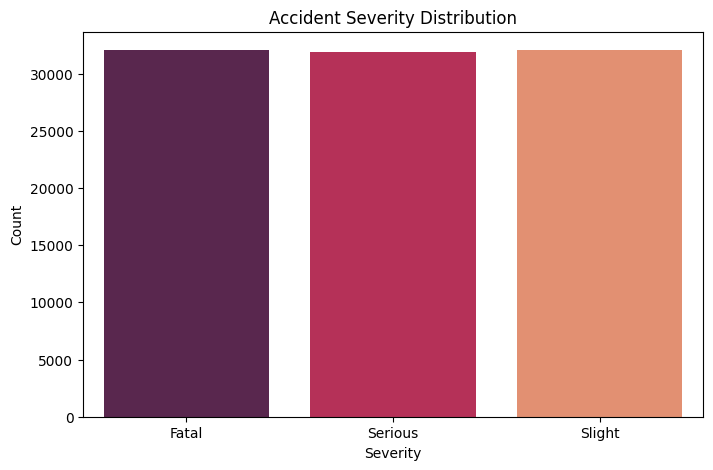

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident_df_cleaned, x="Accident_Severity_Label", palette="rocket")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

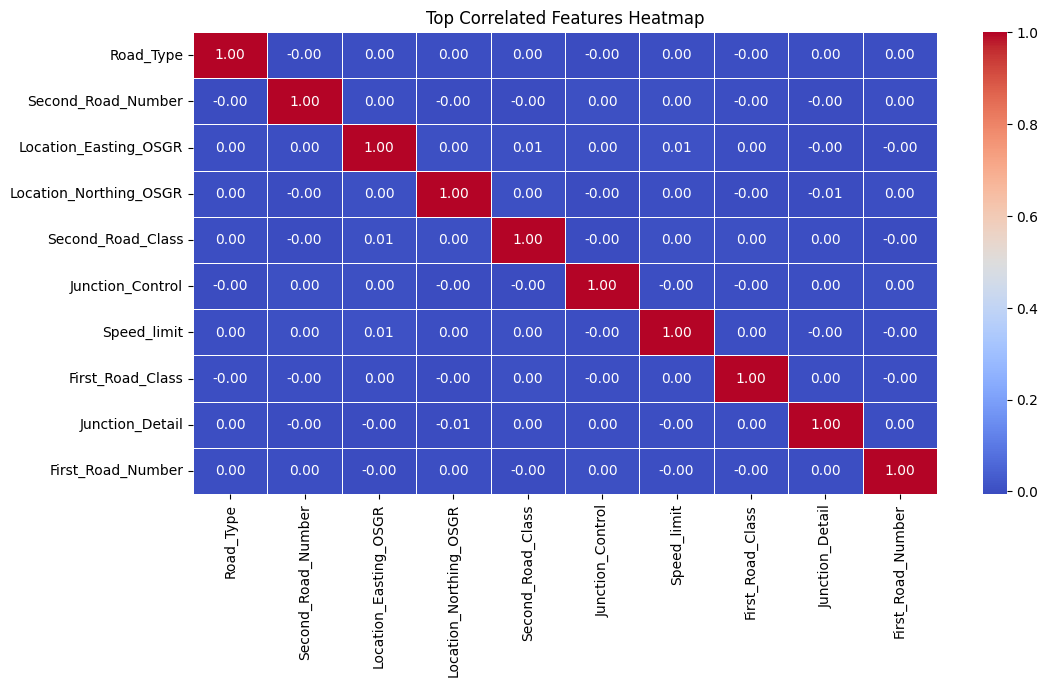

In [ ]:
# Heatmap
numeric_df = df.select_dtypes(include=[np.number])
top_corr_features = numeric_df.corr().abs().unstack().sort_values(ascending=False)
top_features = list(set(top_corr_features.index.get_level_values(0)[:10]))
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Top Correlated Features Heatmap")
plt.show()

<Figure size 1000x500 with 0 Axes>

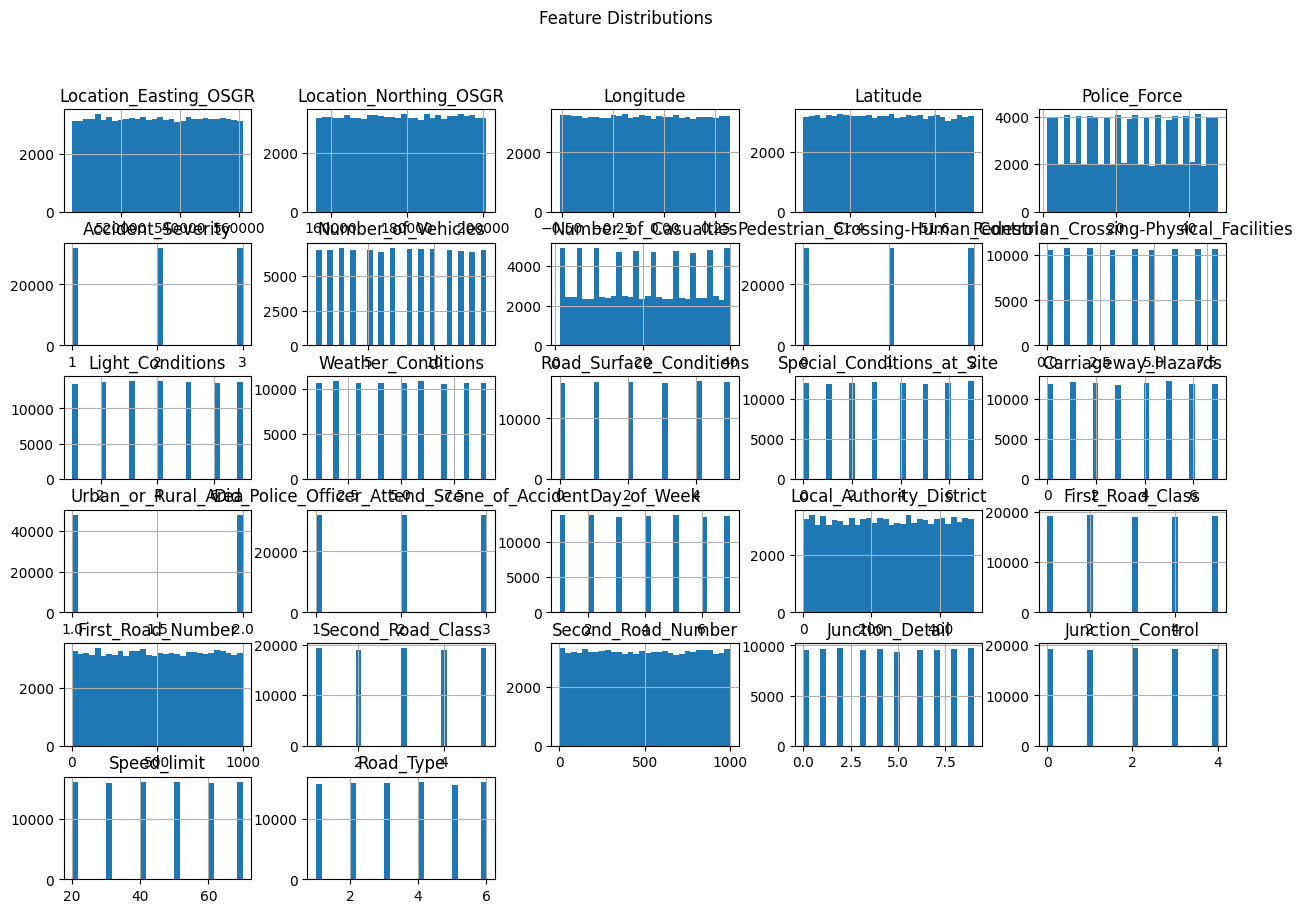

In [ ]:
# EDA
plt.figure(figsize=(10, 5))
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Accuracy: 0.33395833333333336

Decision Tree Classifier Report:
              precision    recall  f1-score   support

       Fatal       0.34      0.41      0.37      6467
     Serious       0.34      0.23      0.28      6361
      Slight       0.33      0.36      0.34      6372

    accuracy                           0.33     19200
   macro avg       0.33      0.33      0.33     19200
weighted avg       0.33      0.33      0.33     19200



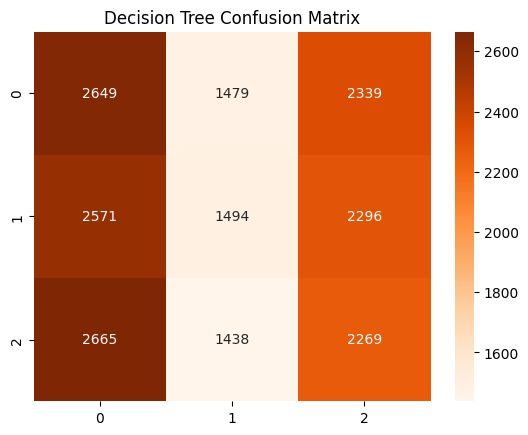

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6,class_weight='balanced')

# Train Decision Tree
dt_model.fit(X_train_scaled, y_train)
y_dt_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_dt_pred, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.3304166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29      6467
           1       0.33      0.28      0.30      6361
           2       0.33      0.47      0.39      6372

    accuracy                           0.33     19200
   macro avg       0.33      0.33      0.32     19200
weighted avg       0.33      0.33      0.32     19200



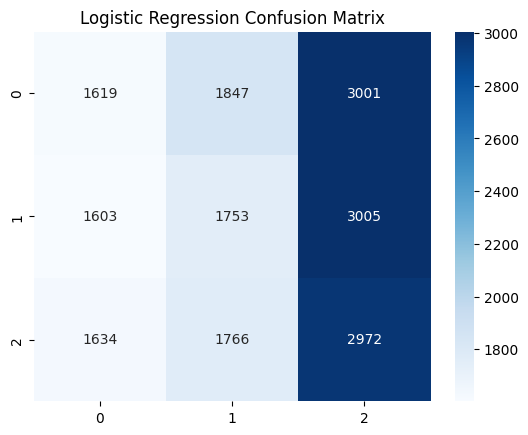

In [ ]:
### **Logistic Regression**
log_model = LogisticRegression(class_weight='balanced',max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



Random Forest Accuracy: 0.3350520833333333
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.33      6467
           1       0.34      0.34      0.34      6361
           2       0.33      0.34      0.34      6372

    accuracy                           0.34     19200
   macro avg       0.34      0.34      0.34     19200
weighted avg       0.34      0.34      0.34     19200



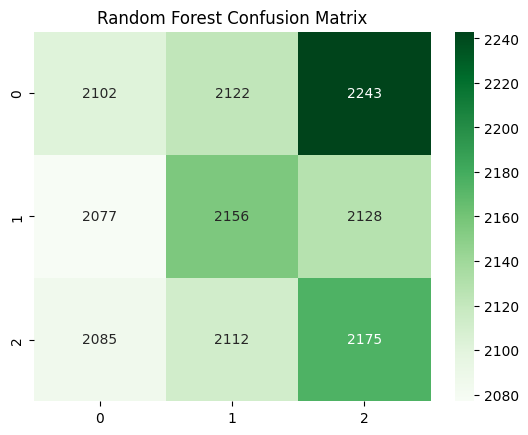

In [ ]:
### **Random Forest**
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


SVM Accuracy: 0.33338541666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.25      0.29      6467
           1       0.33      0.25      0.28      6361
           2       0.33      0.50      0.40      6372

    accuracy                           0.33     19200
   macro avg       0.33      0.33      0.32     19200
weighted avg       0.33      0.33      0.32     19200



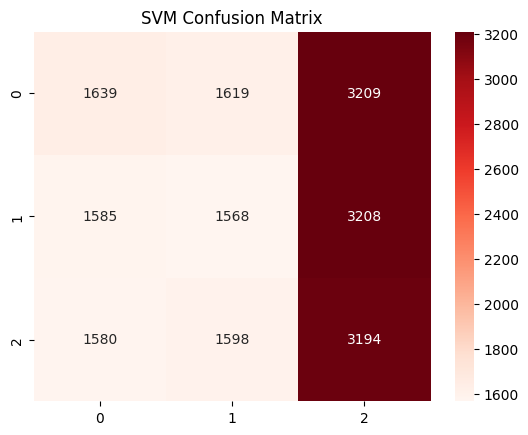

In [13]:
### **Support Vector Machine (SVM)**
svm_model = SVC(class_weight='balanced',kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("SVM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.335
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.34      6467
           1       0.33      0.32      0.32      6361
           2       0.33      0.35      0.34      6372

    accuracy                           0.34     19200
   macro avg       0.34      0.34      0.33     19200
weighted avg       0.34      0.34      0.33     19200



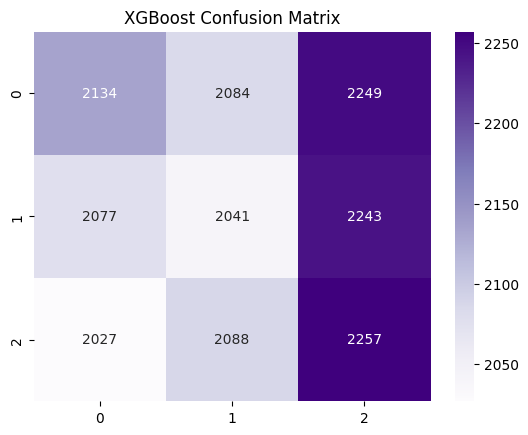

In [14]:
### **XGBoost**
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',class_weight='balanced')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 76800, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

LightGBM Accuracy: 0.32838541666666665
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33      6467
           1       0.33      0.32      0.32      6361
           2       0.33      0.33      0.33      6372

    accuracy                           0.33     19200
   macro avg       0.33      0.33      0.33     19200
weighted avg       0.33      0.33      0.33     19200



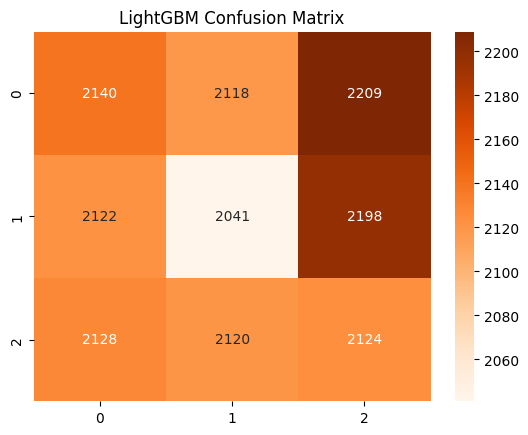

In [15]:
### **LightGBM**
lgb_model = lgb.LGBMClassifier(class_weight='balanced')
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\nLightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Oranges')
plt.title("LightGBM Confusion Matrix")
plt.show()

In [17]:
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfc, file)